In [6]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import DailyReturns,Returns
from quantopian.pipeline.data import USEquityPricing
from quantopian.research import run_pipeline
from datetime import timedelta, date
import pandas as pd
import numpy as np
from quantopian.pipeline.experimental import QTradableStocksUS
from quantopian.pipeline.filters import  StaticAssets
import matplotlib.pyplot as plt

 Get worst vingtile among US tradable stocks

In [3]:
#Define the make_line function for worst 20%  
def get_worst_vingtile():
    
    base_universe = QTradableStocksUS()
    
    returns = DailyReturns(
        inputs = [USEquityPricing.close])
    
    worst_returns_filter = returns.percentile_between(0,20)
    
    return Pipeline(
        columns={
            'Worst_Vingtile_Return': returns
        },
        screen = worst_returns_filter & base_universe
    )

In [4]:
#Define the make_line function for best 20%
def get_best_vingtile():
    
    returns = DailyReturns(
        inputs = [USEquityPricing.close])
    
    best_returns_filter = returns.percentile_between(80,100)
    
    return Pipeline(
        columns={
            'Best_Vingtile_Return': returns
        },
        screen = best_returns_filter
    )


In [5]:
worst_vingtile = run_pipeline(get_worst_vingtile(), '2019-04-01', '2019-04-10')
best_vingtile = run_pipeline(get_best_vingtile(),'2015-05-01','2015-05-01')
worst_vingtile.reset_index(inplace = True)
best_vingtile.reset_index(inplace = True)

In [6]:
worst_vingtile.columns = ['Date','Equity','Worst_Vingtile_Return']
best_vingtile.columns = ['Date','Equity','Best_Vingtile_Return']

In [7]:
worst_vingtile.groupby('Date').mean()
best_vingtile.groupby('Date').mean()

,Best_Vingtile_Return
Date,
2015-05-01 00:00:00+00:00,0.018873


In [8]:
worst_vingtile


,Date,Equity,Worst_Vingtile_Return
0,2019-04-01 00:00:00+00:00,Equity(41 [ARCB]),-0.026924
1,2019-04-01 00:00:00+00:00,Equity(64 [GOLD]),-0.012248
2,2019-04-01 00:00:00+00:00,Equity(216 [HES]),-0.011649
3,2019-04-01 00:00:00+00:00,Equity(289 [MATX]),-0.007424
4,2019-04-01 00:00:00+00:00,Equity(448 [APA]),-0.011969
5,2019-04-01 00:00:00+00:00,Equity(559 [ASH]),-0.010010
6,2019-04-01 00:00:00+00:00,Equity(660 [AVP]),-0.029801
7,2019-04-01 00:00:00+00:00,Equity(739 [BBBY]),-0.019053
8,2019-04-01 00:00:00+00:00,Equity(1028 [BXS]),-0.008082
9,2019-04-01 00:00:00+00:00,Equity(1068 [BPT]),-0.011144


In [137]:
def compute_future_performance( EquitySeries ):
    #returns are the factors we will return to caller
    returns = DailyReturns(
        inputs = [USEquityPricing.close])
    #Define the base universe as the first filter
    base_universe = QTradableStocksUS()
    #T is the length of sid
    T = EquitySeries.size
    inclusion_list = [None] * T
    #Create the inclusion list
    for i in range(T):
        inclusion_list[i] = symbols(EquitySeries[i].symbol)
    
    inclusion_filter = StaticAssets(inclusion_list)
    
    pipe = Pipeline(columns={'Future Returns':returns},
                    screen = (base_universe & inclusion_filter))
    
    return pipe
    

In [153]:
future_performance_worst_vingtile = run_pipeline(compute_future_performance( worst_vingtile['Equity'] ),'2015-05-02','2016-05-31')
future_performance_best_vingtile = run_pipeline(compute_future_performance( best_vingtile['Equity'] ),'2015-05-02','2016-05-31')

In [154]:
future_performance_worst_vingtile.reset_index(inplace = True)
future_performance_best_vingtile.reset_index(inplace = True)
future_performance_worst_vingtile.columns = ['Date','Equity','Future Returns']
future_performance_best_vingtile.columns = ['Date','Equity','Future Returns']

In [155]:
average_future_performance_worst_vingtile=future_performance_worst_vingtile.groupby('Date').mean()
average_future_performance_best_vingtile=future_performance_best_vingtile.groupby('Date').mean()

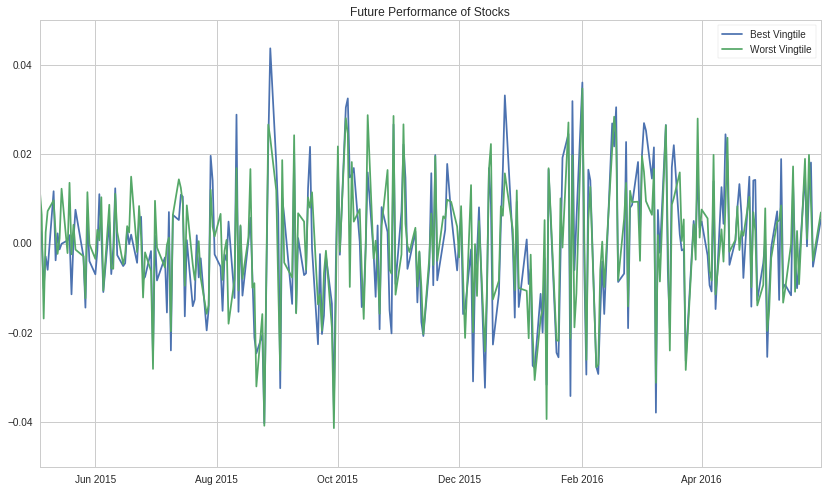

In [161]:
plt.plot(average_future_performance_best_vingtile)
plt.plot(average_future_performance_worst_vingtile)
plt.legend(['Best Vingtile','Worst Vingtile'])
plt.title('Future Performance of Stocks')

In [162]:
print 'Mean return of best vingtile'
print average_future_performance_best_vingtile.mean()
print 'Mean return of worst vingtile'
print average_future_performance_worst_vingtile.mean()

Mean return of best vingtile
Future Returns   -0.000692
dtype: float64
Mean return of worst vingtile
Future Returns   -0.000106
dtype: float64


In [21]:
def compute_future_performance( ):
    #returns are the factors we will return to caller
    returns = DailyReturns(
        inputs = [USEquityPricing.close])
    #Define the base universe as the first filter
    base_universe = QTradableStocksUS()
    #T is the length of sid
    T = 1
    inclusion_list = [None] * T
    #Create the inclusion list
    for i in range(T):
        inclusion_list[i] = symbols('SPY')
    
    inclusion_filter = StaticAssets(inclusion_list)
    
    pipe = Pipeline(columns={'Future Returns':returns},
                    screen = (base_universe & inclusion_filter))
    
    return pipe

In [22]:
ret = run_pipeline(compute_future_performance(),"2019-04-01","2019-04-21")

In [23]:
ret

,,Future Returns
